# Calculate Correlation Coefficients:

+ Account for all movies in the MDCK dataset
+ Calculate for cells in Gen #1-6
+ Only include cells with cell cycle duration of <7.0, 42.0>

**Studies that report correlation coefficients:**
+ [Kuchen et al., 2020](https://elifesciences.org/articles/51002 "Hidden long-range memories of growth and cycle speed correlate cell cycles in lineage trees") - TET21N neuroblastoma cells (count = ???)
+ [Chakrabarti et al., 2018](https://www.nature.com/articles/s41467-018-07788-5 "Hidden heterogeneity and circadian-controlled cell fate inferred from single cell lineages") - HCT116 human colorectal cancer cells (count = 71 vs 80 pairs)
+ [Sandler et al., 2015](https://www.nature.com/articles/nature14318 "Lineage correlations of single cell division time as a probe of cell-cycle dynamics") - L1210 lymphoblast cells (count = 432 vs 423 cells)
+ [Staudte el al., 1974](https://www.sciencedirect.com/science/article/pii/S0022519384801150 "Additive models for dependent cell populations")

In [1]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("../")
from Development.Movie_Analysis_Pipeline.Single_Movie_Processing.Server_Movies_Paths import Get_MDCK_Movies_Paths_Temporary
sys.path.append("../")
from Family_Relations.Find_Family_Members_Class import Find_Family
from tqdm import tqdm
from scipy import stats


In [2]:
names = ["mother", "sister", 
         "grandmother", 'aunt', "1st cousins", 
         "1x great-grandmother", "grandaunt", "1st cousins 1-ce rem", "2nd cousins", 
         "2x great-grandmother", "1x great-grandaunt", "1st cousins 2-ce rem", "2nd cousins 1-ce rem", "3rd cousins", 
         "3x great-grandmother", "2x great-grandaunt", "1st cousins 3-ce rem", "2nd cousins 2-ce rem", "3rd cousins 1-ce rem", "4th cousins"] 


In [3]:
movies = Get_MDCK_Movies_Paths_Temporary()
data = [[] for _ in range(len(names) + 1)] # +1 for itself (= first list) 
unique_trees_counter = 0

for movie in movies:
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    print (f"{date}, {pos}", end="\t")
    
    cells_all, cells_real, cells_mine = [], [], []
    unique_founders = []
    
    with h5py.File(hdf5_file, 'r') as f:
        lbepr_1 = list(f['tracks']['obj_type_1']['LBEPR'])
        lbepr_2 = list(f['tracks']['obj_type_1']['Ch_Ch_Gen_CCT'])
    
    for cell, progeny in zip(lbepr_1, lbepr_2):
        cells_all.append(int(cell[0]))
        if cell[4] != 0 and progeny[0] != 0 and progeny[1] != 0 and progeny[2] != 0:
            cells_real.append(int(cell[0]))
            if 7.0 <= progeny[3] <= 42.0:
                cells_mine.append(int(cell[0]))
                if int(cell[4]) not in unique_founders:
                    unique_founders.append(int(cell[4]))

    """
    # How many unique trees do your cells originate from? Iterate founders & check if ANY 2 family members are within <7, 42> interval
    for founder in unique_founders:
        temporary_members = 0
        for cell, progeny in zip(lbepr_1, lbepr_2):
            if cell[4] == founder:
                if 7.0 <= progeny[3] <= 42.0:
                    temporary_members += 1
        if temporary_members >= 2:
            unique_trees_counter += 1  
    #print (f"Unique Trees: {unique_trees_counter}")
    """
    
    for cell in tqdm(cells_mine):
        family = Find_Family(lbepr_1=lbepr_1, lbepr_2=lbepr_2, cells_all=cells_all, cells_real=cells_real, cell_ID=cell)
        data[0].append(family.Find_Itself())
        data[1].append(family.Find_Mother())
        data[2].append(family.Find_Sister())
        data[3].append(family.Find_Grandmother())
        data[4].append(family.Find_Aunt())
        data[5].append(family.Find_FirstCousins())
        data[6].append(family.Find_Greatgrandmother())
        data[7].append(family.Find_Greataunt())
        data[8].append(family.Find_FirstCousinsOnceRemoved())
        data[9].append(family.Find_SecondCousins())
        data[10].append(family.Find_Greatgreatgrandmother())
        data[11].append(family.Find_Greatgrandaunt())
        data[12].append(family.Find_FirstCousinsTwiceRemoved())
        data[13].append(family.Find_SecondCousinsOnceRemoved())
        data[14].append(family.Find_ThirdCousins())
        data[15].append(family.Find_Greatgreatgreatgrandmother())
        data[16].append(family.Find_Greatgreatgrandaunt())
        data[17].append(family.Find_FirstCousinsThriceRemoved())
        data[18].append(family.Find_SecondCousinsTwiceRemoved())
        data[19].append(family.Find_ThirdCousinsOnceRemoved())
        data[20].append(family.Find_FourthCousins())


AB0124, pos7	

100%|██████████| 389/389 [01:28<00:00,  4.39it/s]


AB0124, pos8	

100%|██████████| 393/393 [01:51<00:00,  3.52it/s]


AB0124, pos9	

100%|██████████| 435/435 [01:35<00:00,  4.55it/s]


AB0327, pos0	

100%|██████████| 440/440 [01:11<00:00,  6.16it/s]


AB0327, pos10	

100%|██████████| 443/443 [01:02<00:00,  7.08it/s]


AB0327, pos2	

100%|██████████| 518/518 [01:27<00:00,  5.89it/s]


AB0327, pos4	

100%|██████████| 454/454 [01:12<00:00,  6.30it/s]


AB0327, pos6	

100%|██████████| 330/330 [00:43<00:00,  7.59it/s]


AB0327, pos8	

100%|██████████| 395/395 [00:45<00:00,  8.75it/s]


AB0724, pos0	

100%|██████████| 214/214 [00:18<00:00, 11.88it/s]


AB0724, pos11	

100%|██████████| 269/269 [00:24<00:00, 11.18it/s]


AB0724, pos13	

100%|██████████| 228/228 [00:15<00:00, 14.61it/s]


AB0724, pos2	

100%|██████████| 172/172 [00:08<00:00, 20.25it/s]


AB0724, pos4	

100%|██████████| 269/269 [00:24<00:00, 10.88it/s]


AB0724, pos6	

100%|██████████| 260/260 [00:26<00:00,  9.89it/s]


AB0724, pos7	

100%|██████████| 287/287 [00:26<00:00, 10.64it/s]


AB0724, pos8	

100%|██████████| 270/270 [00:33<00:00,  8.08it/s]


AB0724, pos9	

100%|██████████| 244/244 [00:18<00:00, 13.42it/s]


AB0731, pos0	

100%|██████████| 303/303 [00:13<00:00, 21.68it/s]


AB0731, pos1	

100%|██████████| 329/329 [00:21<00:00, 15.39it/s]


AB0731, pos2	

100%|██████████| 482/482 [00:45<00:00, 10.55it/s]


AB0731, pos3	

100%|██████████| 474/474 [00:59<00:00,  7.98it/s]


AB0731, pos4	

100%|██████████| 434/434 [00:47<00:00,  9.19it/s]


AB0731, pos5	

100%|██████████| 374/374 [00:34<00:00, 10.77it/s]


AB0731, pos6	

100%|██████████| 448/448 [00:47<00:00,  9.43it/s]


AB0731, pos7	

100%|██████████| 413/413 [00:43<00:00,  9.39it/s]


AB0731, pos8	

100%|██████████| 309/309 [00:19<00:00, 15.95it/s]


GV0794, pos11	

100%|██████████| 257/257 [00:10<00:00, 24.29it/s]


GV0794, pos12	

100%|██████████| 153/153 [00:07<00:00, 21.33it/s]


GV0795, pos0	

100%|██████████| 174/174 [00:11<00:00, 15.11it/s]


GV0795, pos11	

100%|██████████| 907/907 [03:37<00:00,  4.16it/s]


GV0795, pos12	

100%|██████████| 916/916 [03:49<00:00,  3.99it/s]


GV0795, pos13	

100%|██████████| 637/637 [01:45<00:00,  6.04it/s]


GV0796, pos11	

100%|██████████| 852/852 [02:45<00:00,  5.14it/s]


GV0796, pos12	

100%|██████████| 810/810 [02:25<00:00,  5.57it/s]


GV0796, pos13	

100%|██████████| 690/690 [01:47<00:00,  6.44it/s]


GV0796, pos14	

100%|██████████| 878/878 [03:10<00:00,  4.60it/s]


GV0798, pos0	

100%|██████████| 233/233 [00:14<00:00, 16.09it/s]


GV0798, pos11	

100%|██████████| 829/829 [02:15<00:00,  6.11it/s]


GV0798, pos12	

100%|██████████| 813/813 [02:17<00:00,  5.93it/s]


GV0798, pos13	

100%|██████████| 800/800 [02:11<00:00,  6.07it/s]


GV0800, pos0	

100%|██████████| 281/281 [00:18<00:00, 15.16it/s]


GV0800, pos11	

100%|██████████| 594/594 [01:06<00:00,  8.96it/s]


GV0800, pos12	

100%|██████████| 677/677 [01:29<00:00,  7.58it/s]


### Prepare vectors for calculating correlations:

In [4]:
correlations = [[] for _ in range(2)]
data_pairs = []

for i in range(1, len(names) + 1):
    itself_list, family_list = [], []
    for cell, family in zip(data[0], data[i]):
        if len(family) == 3:
            if family[2] is not None:
                if 1 <= family[1] <= 6:
                    if 7.0 <= family[2] <= 42.0:
                        itself_list.append(cell[2])
                        family_list.append(family[2])
        else:
            for member in family:
                if member[2] is not None:
                    if 1 <= member[1] <= 6:
                        if 7.0 <= member[2] <= 42.0:
                            itself_list.append(cell[2])
                            family_list.append(member[2])

    if len(itself_list) != len(family_list):
        raise ValueError
    
    data_pairs.append(len(itself_list))
    
    coe_P = stats.pearsonr(x=itself_list, y=family_list)
    coe_S = stats.spearmanr(a=itself_list, b=family_list)
    correlations[0].append(coe_P[0])
    correlations[1].append(coe_S[0])


### Define functions to calculate 95% confidence intervals, given the correlation coefficients & number of pairs:

In [5]:
# 95% confidence interval for Pearson coefficient:

def pearsonr_ci(rho, count, alpha=0.05):
    r_z = np.arctanh(rho)
    se = 1/np.sqrt(count-3)
    z = stats.norm.ppf(1-alpha/2)
    low_z, upp_z = r_z-z*se, r_z+z*se
    lower, upper = np.tanh((low_z, upp_z))
    return lower, upper


# 95% confidence interval for Spearmann coefficient:

def spearmanr_ci(rho, count, alpha=0.05):
    delta = 1.96 * (1.0 / math.sqrt(count - 3))
    lower = math.tanh(math.atanh(rho) - delta)
    upper = math.tanh(math.atanh(rho) + delta)
    return lower, upper


### Plot the correlations:

In [6]:
# For the publication:

colours = ["goldenrod", "darkgoldenrod", "gold", "goldenrod", "darkgoldenrod", "gold", "gold", "goldenrod", "darkgoldenrod", "gold", "gold", "gold", "goldenrod", "darkgoldenrod", "gold", "gold", "gold", "gold", "goldenrod", "darkgoldenrod"]
alphas = [1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 0.4, 0.6, 1.0, 1.0, 1.0, 0.2, 0.4, 0.6, 1.0, 1.0, 1.0]
pairs = [str(item) for item in data_pairs]

pear = correlations[0]
lower_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(pear, pairs)]
upper_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(pear, pairs)]

spea = correlations[1]
lower_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(spea, pairs)]
upper_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(spea, pairs)]


In [7]:
save_dr = "/Users/kristinaulicna/Documents/LIDo_PhD_Programme/Cells_MDCK/overall_analysis/Figure_2_Three_Candidates/cell_cycle_graphs/"


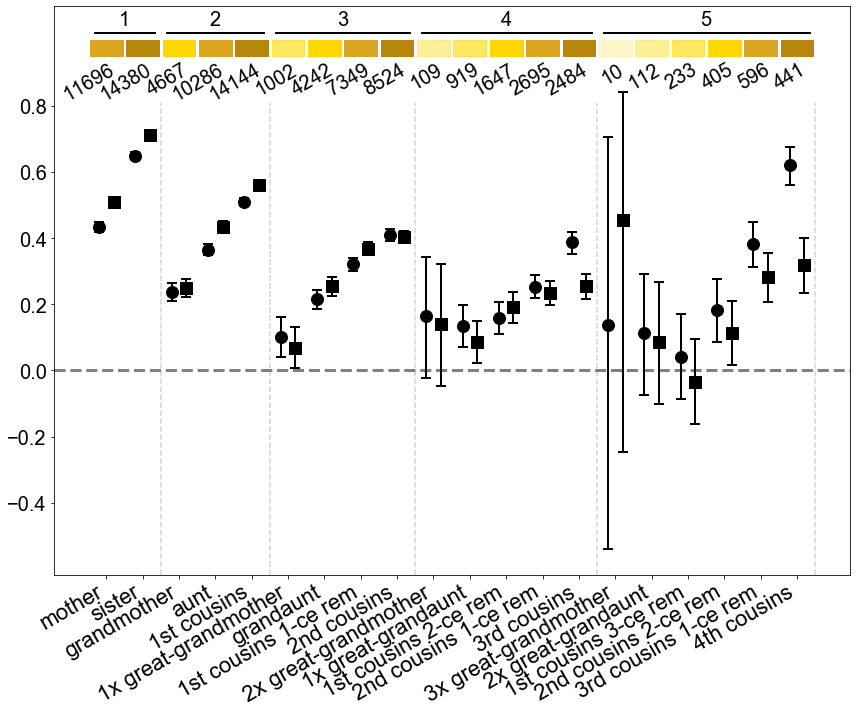

In [8]:
# Plot the thing:
_ = plt.figure(figsize=(12, 10))
plt.errorbar([item - 0.2 for item in range(len(pairs))], pear, 
             yerr=([i - j for i, j in zip(pear, lower_p)], [i - j for i, j in zip(upper_p, pear)]), 
             marker='o', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Pearson Correlation Coefficient ± 95% Confidence Interval")
plt.errorbar([item + 0.2 for item in range(len(pairs))], spea, 
             yerr=([i - j for i, j in zip(spea, lower_s)], [i - j for i, j in zip(upper_s, spea)]), 
             marker='s', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Spearman Correlation Coefficient ± 95% Confidence Interval")

x1, x2 = -0.45, 0.45
for colour, alpha, pair in zip(colours, alphas, pairs):
    plt.fill_betweenx(y=[0.95, 1.0], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    plt.text(x=x1+0.78, y=0.94, s=str(pair), horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=20)
    x1 += 1.0
    x2 += 1.0

x1, x2 = -0.35, 1.35
for i in range(5):
    plt.fill_betweenx(y=[1.020, 1.023], x1=x1, x2=x2, color="black", alpha=alpha, zorder=0)
    plt.text(x=x1+(x2-x1)/2, y=1.06, s=str(i+1), fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
    plt.axvline(x=x2+0.15, ymax=0.83, color="lightgrey", linestyle="dashed", zorder=0)
    x1 += i + 2
    x2 += i + 3

plt.axhline(y=0, color="grey", linestyle="dashed", linewidth=3.0, zorder=0)
plt.xticks(list(range(len(names))), [f"{name}" for name, pair in zip(names, pairs)], horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=22)
plt.yticks([item / 10 for item in range(-4, 9, 2)], fontname="Arial", fontsize=20)
#plt.tick_params(axis='y', which='both', labelleft=False, labelright=True, left=False, right=True)
#plt.title("Family Member Correlations")
#plt.legend(loc='center', ncol=2, fontsize=14)

#plt.spines['top'].set_visible(False)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.tight_layout()
#plt.savefig(save_dr + "family_correlations.pdf", bbox_to_inches="tight", transparent=True)
plt.show()


# TODO: Try to plot the slopes & characterise how they change over time:

In [9]:
print (pear)
print (spea)
print (pairs)


[0.4337356562804886, 0.6500989138928635, 0.23761530387683968, 0.3652439989089773, 0.5094746759813471, 0.10205040502878437, 0.21609026233573256, 0.3213543911368465, 0.40951448610073304, 0.16629722043713782, 0.1358037169196509, 0.15892281260536598, 0.2534229556944564, 0.38721330861429454, 0.13727230499491005, 0.11327090388819755, 0.04231021043065497, 0.1829520374523328, 0.38265998142787716, 0.6210469979281489]
[0.5096854774317578, 0.7136096400630184, 0.2507076440938122, 0.43506467069865223, 0.5596108931010704, 0.06865104292451837, 0.25473156956548604, 0.3678430747070195, 0.4051946967727668, 0.14189487709774484, 0.08723993571310645, 0.19064625919404155, 0.23417806746674022, 0.25484852909027017, 0.45472646778424997, 0.08656900395750511, -0.034542930553777704, 0.1139486999943567, 0.2836471704747195, 0.3194913354447541]
['11696', '14380', '4667', '10286', '14144', '1002', '4242', '7349', '8524', '109', '919', '1647', '2695', '2484', '10', '112', '233', '405', '596', '441']


Common nearest depth: 1 -> Pear: [0.434, 0.65]; Spea: [0.51, 0.714]
Pearson: slope = 0.21636325761237485 intercept = 0.4337356562804886
Spearman: slope = 0.20392416263126056 intercept = 0.5096854774317578
Common nearest depth: 2 -> Pear: [0.238, 0.365, 0.509]; Spea: [0.251, 0.435, 0.56]
Pearson: slope = 0.1359296860522537 intercept = 0.23484830687013436
Spearman: slope = 0.1544516245036291 intercept = 0.2606761114608825
Common nearest depth: 3 -> Pear: [0.102, 0.216, 0.321, 0.41]; Spea: [0.069, 0.255, 0.368, 0.405]
Pearson: slope = 0.10276563720169599 intercept = 0.10810393034798016
Spearman: slope = 0.11227424666862788 intercept = 0.10569372598950588
Common nearest depth: 4 -> Pear: [0.166, 0.136, 0.159, 0.253, 0.387]; Spea: [0.142, 0.087, 0.191, 0.234, 0.255]
Pearson: slope = 0.05594514151291189 intercept = 0.10844171982835736
Spearman: slope = 0.03728454357386845 intercept = 0.10719244656464376
Common nearest depth: 5 -> Pear: [0.137, 0.113, 0.042, 0.183, 0.383, 0.621]; Spea: [0.455

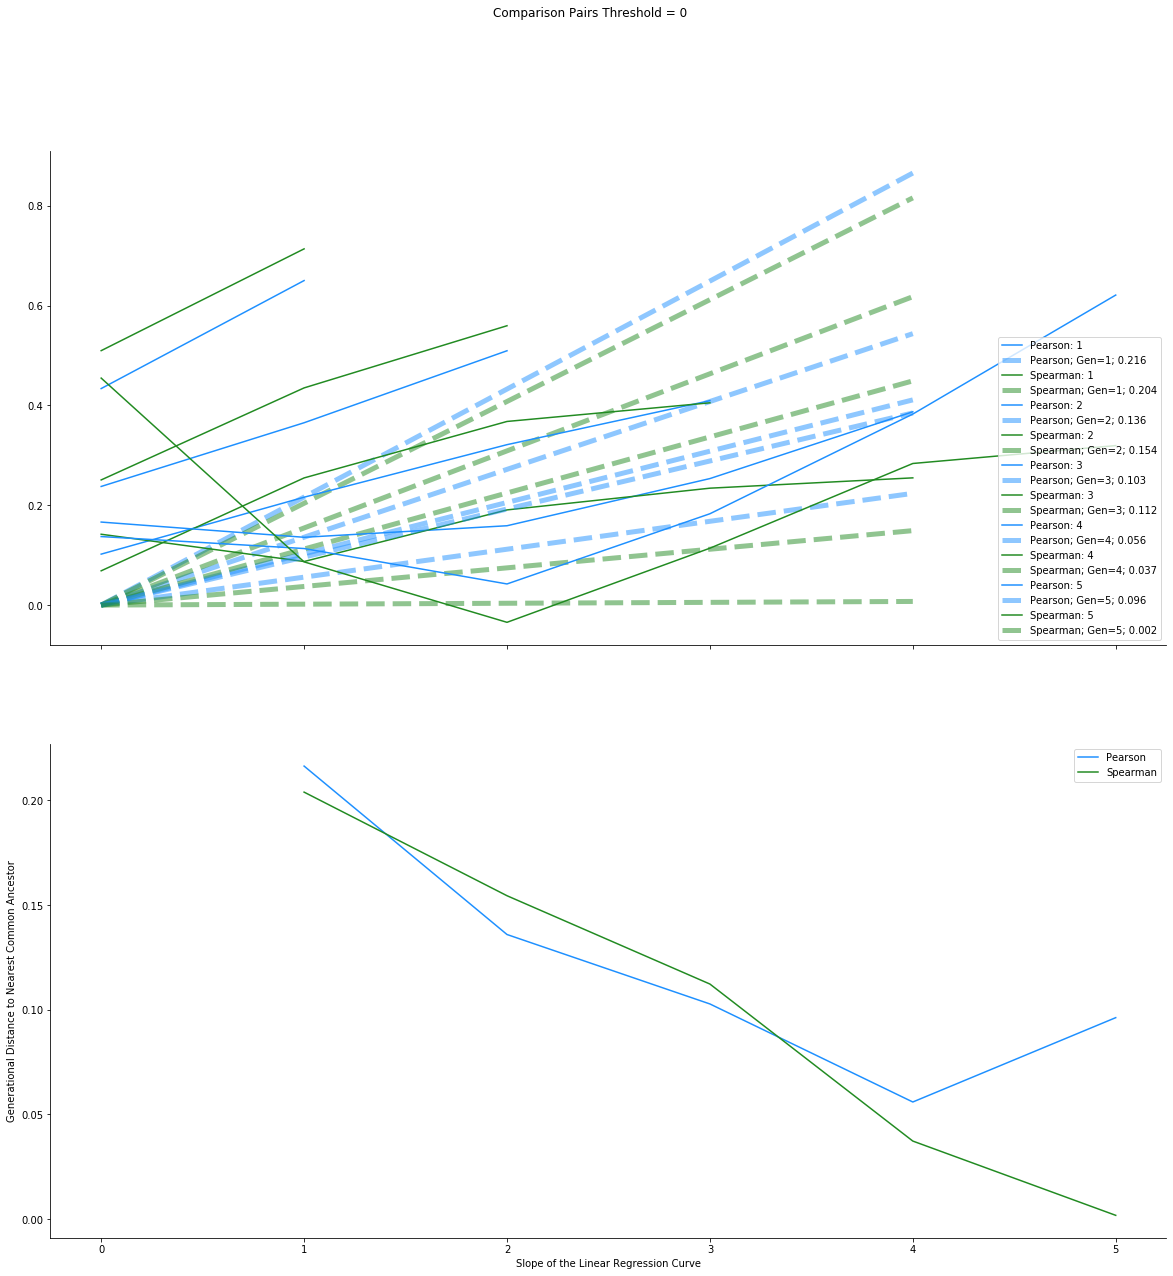

[[0.21636325761237485, 0.1359296860522537, 0.10276563720169599, 0.05594514151291189, 0.09621950069448316], [0.20392416263126056, 0.1544516245036291, 0.11227424666862788, 0.03728454357386845, 0.0018157276686370889]]


In [22]:
gen_dist = ((pear[0:2], spea[0:2]), (pear[2:5], spea[2:5]), (pear[5:9], spea[5:9]), (pear[9:14], spea[9:14]), (pear[14:20], spea[14:20]))
pair_cnt = (data_pairs[0:2], data_pairs[2:5], data_pairs[5:9], data_pairs[9:14], data_pairs[14:20])

for threshold in range(0, 1000 + 1, 200):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 20))
    fig.suptitle(f"Comparison Pairs Threshold = {threshold}")

    slope_list = [[] for _ in range(2)]
    intercept_list = [[] for _ in range(2)]

    for e, ((p, s), pair) in enumerate(zip(gen_dist, pair_cnt)):
        print (f"Common nearest depth: {e+1} -> Pear: {[round(item, 3) for item in p]}; Spea: {[round(item, 3) for item in s]}")

        for ee, (coef, clr, lab) in enumerate(zip([p, s], ["dodgerblue", "forestgreen"], ["Pearson", "Spearman"])):

            # Plot the values of the coefficients:
            axs[0].plot(range(len(coef)), coef, color=clr, label=f"{lab}: {e+1}")

            # Make a fit on points which have enough comparison pairs (set arbitrary threshold) - you don't care about y-axis intercept, just the slope:
            #threshold = 600
            vector = [item for item, comparison in zip(coef, pair) if comparison >= threshold]

            # Regress Linear Fit & Find the Slopes:
            if vector != []:
                slope, intercept, r_value, p_value, std_err = stats.linregress(x=range(len(vector)),y=vector)
                slope_list[ee].append(slope)
                intercept_list[ee].append(intercept)

                print (f"{lab}: slope = {slope} intercept = {intercept}")

                #Plot the Slopes: REMEMBER! y = mx + b; where m = slope, b = y_intercept
                axs[0].plot([item * slope for item in range(0, 5)], label=f"{lab}; Gen={e+1}; {round(slope, 3)}",
                          linestyle="dashed", linewidth=5, color=clr, alpha=0.5)

    for slope, clr, lab in zip(slope_list, ["dodgerblue", "forestgreen"], ["Pearson", "Spearman"]):
        axs[1].plot(range(1, len(slope) + 1), slope, color=clr, label=lab)
    
    axs[1].set_ylabel("Generational Distance to Nearest Common Ancestor")
    axs[1].set_xlabel("Slope of the Linear Regression Curve")
    axs[1].legend()  
    axs[0].legend()
    
    plt.show()
    
    break

print (slope_list)


### Plot the second subaxis to the same scale as the upper one: 

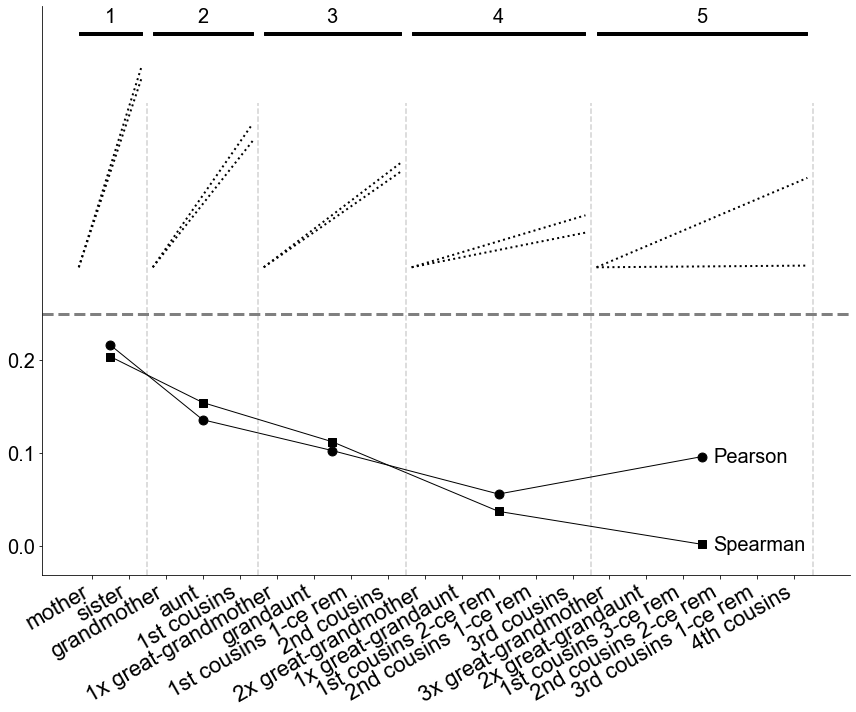

In [23]:
# Plot the thing:
_ = plt.figure(figsize=(12, 10))

x_list = []

x1, x2 = -0.35, 1.35
for i in range(5):
    plt.fill_betweenx(y=[0.550, 0.553], x1=x1, x2=x2, color="black", alpha=alpha, zorder=0)
    plt.text(x=x1+(x2-x1)/2, y=0.57, s=str(i+1), fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
    plt.axvline(x=x2+0.15, ymax=0.83, color="lightgrey", linestyle="dashed", zorder=0)
    
    for corr_type, marker in zip(slope_list, ["o", "s"]):
        slp = corr_type[i]
        
        # Plot the linear regression lines:
        plt.plot([x1, x2], [0.3 + 0 * slp, 0.3 + 1 * slp], label=f"Slope: {slp}", linestyle="dotted", linewidth=2.0, color="black")
        
        # Plot the slope values:
        plt.scatter(x=x1+(x2-x1)/2, y=slp, marker=marker, s=80, color="black")
    
    # Increment:
    x_list.append(x1+(x2-x1)/2)
    x1 += i + 2
    x2 += i + 3
    
# Connect the slopes:
plt.plot(x_list, slope_list[0], color="black", linewidth=1.0, zorder=0)
plt.text(x=x_list[-1] + 0.3, y=slope_list[0][-1], s="Pearson", fontname="Arial", fontsize=20, horizontalalignment='left', verticalalignment='center')
    
plt.plot(x_list, slope_list[1], color="black", linewidth=1.0, zorder=0)
plt.text(x=x_list[-1] + 0.3, y=slope_list[1][-1], s="Spearman", fontname="Arial", fontsize=20, horizontalalignment='left', verticalalignment='center')


plt.axhline(y=0.25, color="grey", linestyle="dashed", linewidth=3.0, zorder=0)
plt.xticks(list(range(len(names))), [f"{name}" for name, pair in zip(names, pairs)], horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=22)
plt.yticks([item / 10 for item in range(3)], fontname="Arial", fontsize=20)
#plt.tick_params(axis='y', which='both', labelleft=False, labelright=True, left=False, right=True)
#plt.title("Family Member Correlations")
#plt.legend(loc='center', ncol=2, fontsize=14)

#plt.spines['top'].set_visible(False)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.tight_layout()
#plt.savefig(save_dr + "family_correlations.pdf", bbox_to_inches="tight", transparent=True)
plt.show()


# TODO: Combine the plots!

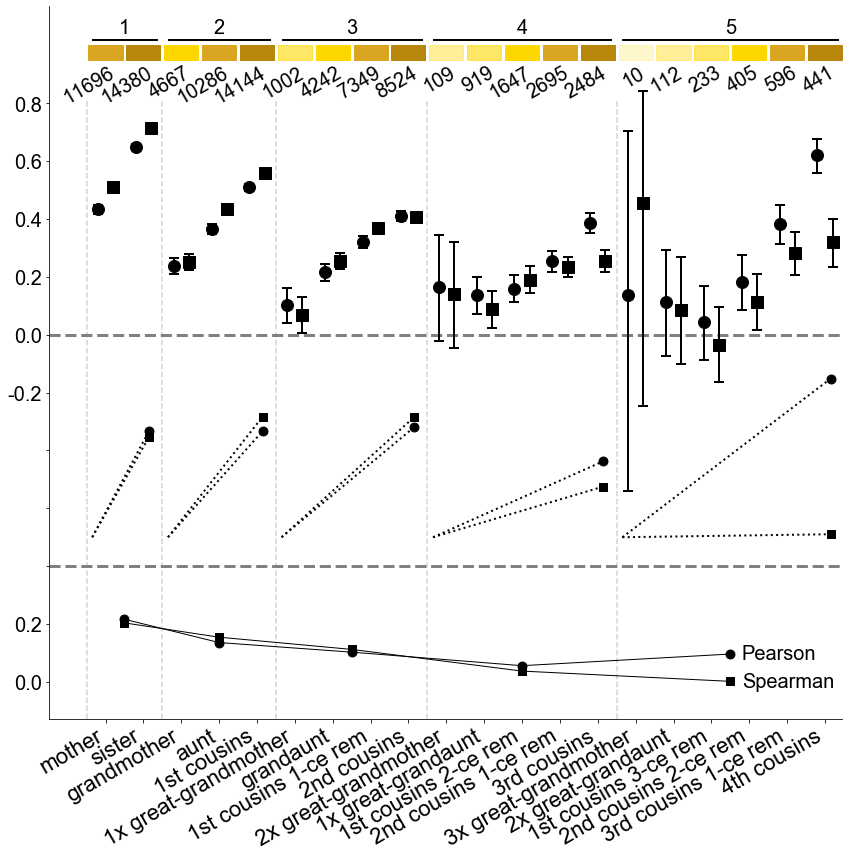

In [24]:
# Plot the thing:
_ = plt.figure(figsize=(12, 12))
plt.errorbar([item - 0.2 for item in range(len(pairs))], pear, 
             yerr=([i - j for i, j in zip(pear, lower_p)], [i - j for i, j in zip(upper_p, pear)]), 
             marker='o', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Pearson Correlation Coefficient ± 95% Confidence Interval")
plt.errorbar([item + 0.2 for item in range(len(pairs))], spea, 
             yerr=([i - j for i, j in zip(spea, lower_s)], [i - j for i, j in zip(upper_s, spea)]), 
             marker='s', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Spearman Correlation Coefficient ± 95% Confidence Interval")

x1, x2 = -0.45, 0.45
for colour, alpha, pair in zip(colours, alphas, pairs):
    plt.fill_betweenx(y=[0.95, 1.0], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    plt.text(x=x1+0.78, y=0.94, s=str(pair), horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=20)
    x1 += 1.0
    x2 += 1.0

x_list = []

x1, x2 = -0.35, 1.35
plt.axvline(x=x1-0.15, ymax=0.87, color="lightgrey", linestyle="dashed", zorder=0)
    
for i in range(5):
    plt.fill_betweenx(y=[1.020, 1.023], x1=x1, x2=x2, color="black", alpha=alpha, zorder=0)
    plt.text(x=x1+(x2-x1)/2, y=1.06, s=str(i+1), fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
    plt.axvline(x=x2+0.15, ymax=0.87, color="lightgrey", linestyle="dashed", zorder=0)
    
    for corr_type, marker in zip(slope_list, ["o", "s"]):
        slp = corr_type[i]
        # Plot the linear regression lines:
        plt.plot([x1, x2 - 0.2], [0 * slp - 0.7, (x2-x1) * slp - 0.7], label=f"Slope: {slp}", linestyle="dotted", linewidth=2.0, color="black")
        plt.scatter(x=x2 - 0.2, y=(x2-x1) * slp - 0.7, marker=marker, s=80, color="black")
        
        # Plot the slope values:
        plt.scatter(x=x1+(x2-x1)/2, y=slp-1.2, marker=marker, s=80, color="black")
    
    # Increment:
    x_list.append(x1+(x2-x1)/2)
    x1 += i + 2
    x2 += i + 3

# Connect the slopes:

plt.plot(x_list, [item - 1.2 for item in slope_list[0]], color="black", linewidth=1.0, zorder=0)
plt.text(x=x_list[-1] + 0.3, y=slope_list[0][-1] - 1.2, s="Pearson", fontname="Arial", fontsize=20, horizontalalignment='left', verticalalignment='center')
    
plt.plot(x_list, [item - 1.2 for item in slope_list[1]], color="black", linewidth=1.0, zorder=0)
plt.text(x=x_list[-1] + 0.3, y=slope_list[1][-1] - 1.2, s="Spearman", fontname="Arial", fontsize=20, horizontalalignment='left', verticalalignment='center')


plt.axhline(y=-0.8, color="grey", linestyle="dashed", linewidth=3.0, zorder=0)
plt.axhline(y=0, color="grey", linestyle="dashed", linewidth=3.0, zorder=0)

plt.xlim(-1.5, 19.45)
plt.xticks(list(range(len(names))), [f"{name}" for name, pair in zip(names, pairs)], horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=22)
y_t = [item / 10 for item in range(-12, 9, 2)]
y_l = [str(item) for item in y_t]
y_l[0] = str(round(float(y_t[0]) + 1.2, 1))
y_l[1] = str(round(float(y_t[1]) + 1.2, 1))
y_l[2:5] = None, None, None
plt.yticks(ticks=y_t, labels=y_l, fontname="Arial", fontsize=20)

plt.tight_layout()
#plt.savefig(save_dr + "family_correlations.pdf", bbox_to_inches="tight", transparent=True)
plt.show()


## Break down into individual axes:

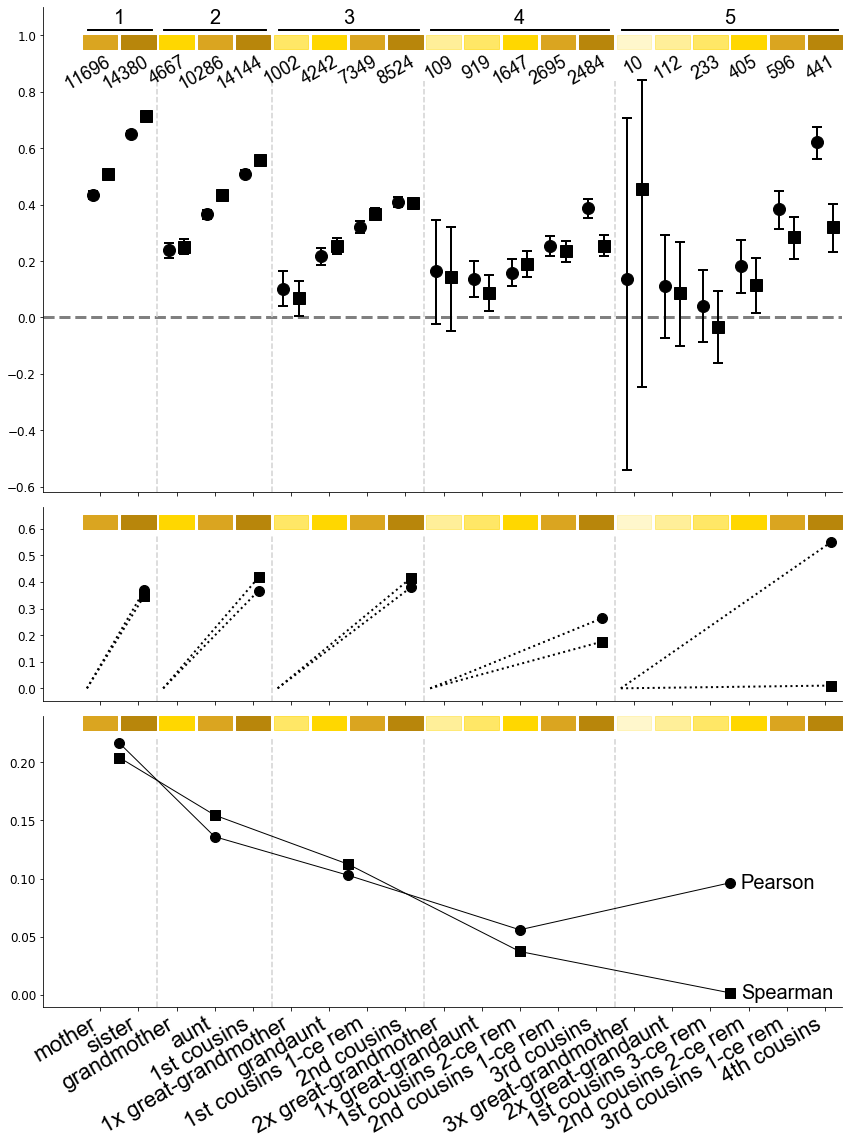

In [39]:
# Plot the thing:
fig, axs = plt.subplots(figsize=(12, 16), nrows=3, ncols=1, sharex=True, gridspec_kw={'height_ratios': [5, 2, 3]})

axs[0].errorbar([item - 0.2 for item in range(len(pairs))], pear, 
             yerr=([i - j for i, j in zip(pear, lower_p)], [i - j for i, j in zip(upper_p, pear)]), 
             marker='o', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Pearson Correlation Coefficient ± 95% Confidence Interval")
axs[0].errorbar([item + 0.2 for item in range(len(pairs))], spea, 
             yerr=([i - j for i, j in zip(spea, lower_s)], [i - j for i, j in zip(upper_s, spea)]), 
             marker='s', markersize=12, color='black', linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Spearman Correlation Coefficient ± 95% Confidence Interval")

x1, x2 = -0.45, 0.45
for colour, alpha, pair in zip(colours, alphas, pairs):
    axs[0].fill_betweenx(y=[0.95, 1.0], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    
    axs[1].fill_betweenx(y=[0.6, 0.65], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    axs[2].fill_betweenx(y=[0.228, 0.24], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    
    axs[0].text(x=x1+0.78, y=0.94, s=str(pair), horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=18)
    x1 += 1.0
    x2 += 1.0

x_list = []

x1, x2 = -0.35, 1.35
axs[0].axhline(y=0, color="grey", linestyle="dashed", linewidth=3.0, zorder=0)

for i in range(5):
    axs[0].fill_betweenx(y=[1.020, 1.023], x1=x1, x2=x2, color="black", alpha=alpha, zorder=0)
    axs[0].text(x=x1+(x2-x1)/2, y=1.06, s=str(i+1), fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
    
    # Plot the vertical lines separating groups & set ticks fontsize per each axis:
    for ax, y_lab in enumerate(["Correlation Coefficient", "Linear Regression Gradient", "Slope Steepness"]):
        ymax = 0.85
        if ax == 2:
            ymax = 0.92
        axs[ax].axvline(x=x2+0.15, ymax=ymax, color="lightgrey", linestyle="dashed", zorder=0)
        axs[ax].tick_params(axis='both', which='major', labelsize=12)
        
    
    # Plot the steepness of the lin regress slopes:
    for corr_type, marker in zip(slope_list, ["o", "s"]):
        slp = corr_type[i]
        
        # Plot the linear regression lines:
        axs[1].plot([x1, x2 - 0.2], [0 * slp, (x2-x1) * slp], label=f"Slope: {slp}", linestyle="dotted", linewidth=2.0, color="black")
        axs[1].scatter(x=x2 - 0.2, y=(x2-x1) * slp, marker=marker, s=100, color="black")
        
        # Plot the slope steepness values:
        axs[2].scatter(x=x1+(x2-x1)/2, y=slp, marker=marker, s=100, color="black")
    
    # Increment:
    x_list.append(x1+(x2-x1)/2)
    x1 += i + 2
    x2 += i + 3

# Connect the slopes & label coefficient type:
for e, word in enumerate(["Pearson", "Spearman"]):
    axs[2].plot(x_list, slope_list[e], color="black", linewidth=1.0, zorder=0)
    axs[2].text(x=x_list[-1] + 0.3, y=slope_list[e][-1], s=word, fontname="Arial", 
                fontsize=20, horizontalalignment='left', verticalalignment='center')

# Set x-axis & visualise:
plt.ylim(-0.01, 0.24)
plt.xlim(-1.5, 19.45)
plt.xticks(list(range(len(names))), [f"{name}" for name, pair in zip(names, pairs)], horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=22)
plt.tight_layout()
plt.savefig(save_dr + "family_correlations.pdf", bbox_to_inches="tight", pad_inches=0, transparent=True)
plt.show()


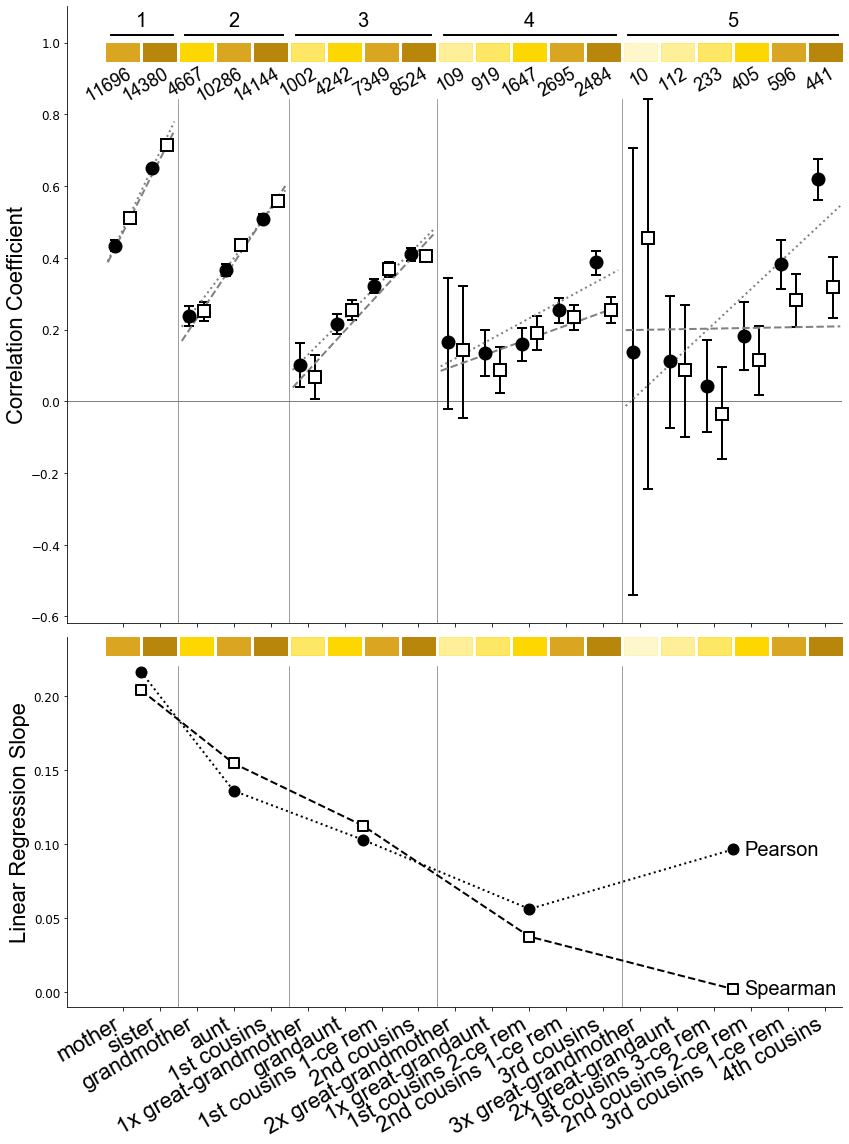

In [97]:
# Plot the thing with 2 axes:

fig, axs = plt.subplots(figsize=(12, 16), nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [5, 3]})

axs[0].errorbar([item - 0.2 for item in range(len(pairs))], pear, 
             yerr=([i - j for i, j in zip(pear, lower_p)], [i - j for i, j in zip(upper_p, pear)]), 
             marker='o', markersize=12, color='black', mec="black", mew=2.0, linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Pearson Correlation Coefficient ± 95% Confidence Interval")
axs[0].errorbar([item + 0.2 for item in range(len(pairs))], spea, 
             yerr=([i - j for i, j in zip(spea, lower_s)], [i - j for i, j in zip(upper_s, spea)]), 
             marker='s', markersize=12, color='white', mec="black", mew=2.0, linewidth=0, ecolor='black', elinewidth=2, capsize=5, capthick=2.0, 
             label="Spearman Correlation Coefficient ± 95% Confidence Interval")

x1, x2 = -0.45, 0.45
for colour, alpha, pair in zip(colours, alphas, pairs):
    axs[0].fill_betweenx(y=[0.95, 1.0], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    
    axs[1].fill_betweenx(y=[0.228, 0.24], x1=x1, x2=x2, color=colour, alpha=alpha, zorder=0)
    
    axs[0].text(x=x1+0.78, y=0.94, s=str(pair), horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=18)
    x1 += 1.0
    x2 += 1.0

x_list = []

axs[0].axhline(y=0, color="grey", linestyle="solid", linewidth=1.0, zorder=0)
axs[0].set_ylabel("Correlation Coefficient", fontname="Arial", fontsize=22)
axs[1].set_ylabel("Linear Regression Slope", fontname="Arial", fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)
   
x1, x2 = -0.35, 1.35

for i in range(5):
    axs[0].fill_betweenx(y=[1.020, 1.023], x1=x1, x2=x2, color="black", alpha=alpha, zorder=0)
    axs[0].text(x=x1+(x2-x1)/2, y=1.06, s=str(i+1), fontname="Arial", fontsize=20, horizontalalignment='center', verticalalignment='center')
    
    # Plot the steepness of the lin regress slopes:
    for corr_type, intrcpt, marker, color, linetype, shift in zip(slope_list, intercept_list, ["o", "s"], ["black", "white"], ["dotted", "dashed"], [+0.2, -0.2]):
        slp = corr_type[i]
        cept = intrcpt[i]
        
        axs[0].axvline(x=x2+0.15, ymax=0.85, color="grey", linestyle="solid", linewidth=0.5, zorder=0)
        axs[1].axvline(x=x2+0.15, ymax=0.92, color="grey", linestyle="solid", linewidth=0.5, zorder=0)

        # Plot the linear regression lines:
        axs[0].plot([x1 - 0.05, x2 + 0.05], [(-0.4 + shift) * slp + cept, (x2 - x1 - 0.3 + shift) * slp + cept], label=f"Slope: {slp}", linestyle=linetype, linewidth=2.0, color="grey")
        
        # Plot the slope steepness values:
        axs[1].scatter(x=x1+(x2-x1)/2, y=slp, marker=marker, s=100, color=color, edgecolors="black", linewidths=2.0)
    
    # Increment:
    x_list.append(x1+(x2-x1)/2)
    x1 += i + 2
    x2 += i + 3

# Connect the slopes & label coefficient type:
for e, (word, line) in enumerate(zip(["Pearson", "Spearman"], ["dotted", "dashed"])):
    axs[1].plot(x_list, slope_list[e], color="black", linestyle=line, linewidth=2.0, zorder=0)
    axs[1].text(x=x_list[-1] + 0.3, y=slope_list[e][-1], s=word, fontname="Arial", 
                fontsize=20, horizontalalignment='left', verticalalignment='center')

# Set x-axis & visualise:
plt.ylim(-0.01, 0.24)
plt.xlim(-1.5, 19.45)
plt.xticks(list(range(len(names))), [f"{name}" for name, pair in zip(names, pairs)], horizontalalignment='right', verticalalignment='top', rotation=30, fontname="Arial", fontsize=22)
plt.tight_layout()
plt.savefig(save_dr + "family_correlations.pdf", bbox_to_inches="tight", pad_inches=0, transparent=True)
plt.show()


### With other studies overlaid (only up to 2nd cousins):


In [27]:
"""
names = ["mother", "sister", "grandmother", 'aunt', "first_cousins", "greatgrandmother", "greataunt", "cousrems", "second_cousins"]
pairs = [str(item) for item in data_pairs]

pear = correlations[0]
lower_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(pear, pairs)]
upper_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(pear, pairs)]

spea = correlations[1]
lower_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(spea, pairs)]
upper_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(spea, pairs)]


#L1210 Fucci cells
count = 432

sandler_m_rho = 0.04
sandler_m_los = spearmanr_ci(rho=sandler_m_rho, count=count, alpha=0.05)[0]
sandler_m_ups = spearmanr_ci(rho=sandler_m_rho, count=count, alpha=0.05)[1]

sandler_s_rho = 0.76
sandler_s_los = spearmanr_ci(rho=sandler_s_rho, count=count, alpha=0.05)[0]
sandler_s_ups = spearmanr_ci(rho=sandler_s_rho, count=count, alpha=0.05)[1]

sandler_c_rho = 0.63
sandler_c_los = spearmanr_ci(rho=sandler_c_rho, count=count, alpha=0.05)[0]
sandler_c_ups = spearmanr_ci(rho=sandler_c_rho, count=count, alpha=0.05)[1]


# Plot the stuff:
_ = plt.figure(figsize=(10, 5))
plt.errorbar([item - 0.1 for item in range(len(names))], pear[:len(names)], yerr=([i - j for i, j in zip(pear[:len(names)], lower_p[:len(names)])], [i - j for i, j in zip(upper_p[:len(names)], pear[:len(names)])]), marker='o', color='dodgerblue', linewidth=0, ecolor='dodgerblue', elinewidth=2, capsize=2, label="Pearson Correlation Coefficient\n   ± 95% Confidence Interval")
plt.errorbar([item + 0.1 for item in range(len(names))], spea[:len(names)], yerr=([i - j for i, j in zip(spea[:len(names)], lower_s[:len(names)])], [i - j for i, j in zip(upper_s[:len(names)], spea[:len(names)])]), marker='o', color='firebrick', linewidth=0, ecolor='firebrick', elinewidth=2, capsize=2, label="Spearman Correlation Coefficient\n   ± 95% Confidence Interval")
plt.errorbar([0.3], [sandler_m_rho], yerr=([sandler_m_rho-sandler_m_los], [sandler_m_ups-sandler_m_rho]), marker='o', color='forestgreen', linewidth=0, ecolor='forestgreen', elinewidth=2, capsize=2, label="Spearmann, Sandler et al., 2015\n(L1210 cells, count = {})".format(count))
plt.errorbar([1.3], [sandler_s_rho], yerr=([sandler_s_rho-sandler_s_los], [sandler_s_ups-sandler_s_rho]), marker='o', color='forestgreen', linewidth=0, ecolor='forestgreen', elinewidth=2, capsize=2)
plt.errorbar([4.3], [sandler_c_rho], yerr=([sandler_c_rho-sandler_c_los], [sandler_c_ups-sandler_c_rho]), marker='o', color='forestgreen', linewidth=0, ecolor='forestgreen', elinewidth=2, capsize=2)

plt.errorbar([0.4 + item for item in range(9)], [0.45, 0.70, 0.05, 0.30, 0.35, -0.2, 0.1, 0.25, 0.35], marker='o', color='orange', linewidth=0, ecolor='orange', elinewidth=2, capsize=2, label="Spearmann, Kuchen et al., 2020\n(TET21N cells, count = ?)")
plt.errorbar([0.45 + item for item in range(9)], [0.10, 0.58, -0.05, -0.05, 0.15, 0.1, -0.05, 0.02, 0.1], marker='o', color='orange', linewidth=0, ecolor='orange', elinewidth=2, capsize=2)
plt.errorbar([0.5 + item for item in range(9)], [0.15, 0.55, -0.10, 0.05, 0.23, -0.07, -0.05, 0.02, 0.18], marker='o', color='orange', linewidth=0, ecolor='orange', elinewidth=2, capsize=2)

plt.xticks(list(range(len(names))), [f"{name}\n{pair}" for name, pair in zip(names, pairs)], horizontalalignment='right', rotation=45)
plt.title("Family Member Correlations")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("family_correlations_overlay.png", bbox_to_inches="tight")
plt.show()

"""

'\nnames = ["mother", "sister", "grandmother", \'aunt\', "first_cousins", "greatgrandmother", "greataunt", "cousrems", "second_cousins"]\npairs = [str(item) for item in data_pairs]\n\npear = correlations[0]\nlower_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(pear, pairs)]\nupper_p = [pearsonr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(pear, pairs)]\n\nspea = correlations[1]\nlower_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[0] for rho, pairs in zip(spea, pairs)]\nupper_s = [spearmanr_ci(rho=rho, count=int(pairs), alpha=0.05)[1] for rho, pairs in zip(spea, pairs)]\n\n\n#L1210 Fucci cells\ncount = 432\n\nsandler_m_rho = 0.04\nsandler_m_los = spearmanr_ci(rho=sandler_m_rho, count=count, alpha=0.05)[0]\nsandler_m_ups = spearmanr_ci(rho=sandler_m_rho, count=count, alpha=0.05)[1]\n\nsandler_s_rho = 0.76\nsandler_s_los = spearmanr_ci(rho=sandler_s_rho, count=count, alpha=0.05)[0]\nsandler_s_ups = spearmanr_ci(rho=sandler